使用设备: cuda
                              text  label
0  啥都不会的洋女也不过跟多数国女持平罢了，从比例来说这是正常情况      1
1                        这你不先透了再甩啊      0
2        非洲有没有什么划时代的产品？有啊，奥密克戎和艾滋病      1
3                 愿意啊，至少得给孩子一个完整的家      0
4                       山东东北安徽笑而不语      0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/queziaa/.local/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 4 ========
训练中...
  Batch 100 / 800
  Batch 200 / 800
  Batch 300 / 800
  Batch 400 / 800
  Batch 500 / 800
  Batch 600 / 800
  Batch 700 / 800

  Average training loss: 0.61

验证中...
  混淆矩阵详情:
  真正例 (TP): 412
  假正例 (FP): 92
  假负例 (FN): 83
  真负例 (TN): 213
  Validation Loss: 0.50
  Accuracy: 0.78
  F1 Score: 0.82

======== Epoch 2 / 4 ========
训练中...
  Batch 100 / 800
  Batch 200 / 800
  Batch 300 / 800
  Batch 400 / 800
  Batch 500 / 800
  Batch 600 / 800
  Batch 700 / 800

  Average training loss: 0.53

验证中...
  混淆矩阵详情:
  真正例 (TP): 381
  假正例 (FP): 75
  假负例 (FN): 114
  真负例 (TN): 230
  Validation Loss: 0.93
  Accuracy: 0.76
  F1 Score: 0.80

======== Epoch 3 / 4 ========
训练中...
  Batch 100 / 800
  Batch 200 / 800
  Batch 300 / 800
  Batch 400 / 800
  Batch 500 / 800
  Batch 600 / 800
  Batch 700 / 800

  Average training loss: 0.30

验证中...
  混淆矩阵详情:
  真正例 (TP): 410
  假正例 (FP): 73
  假负例 (FN): 85
  真负例 (TN): 232
  Validation Loss: 0.99
  Accuracy: 0.80
  F1 Score: 0.84


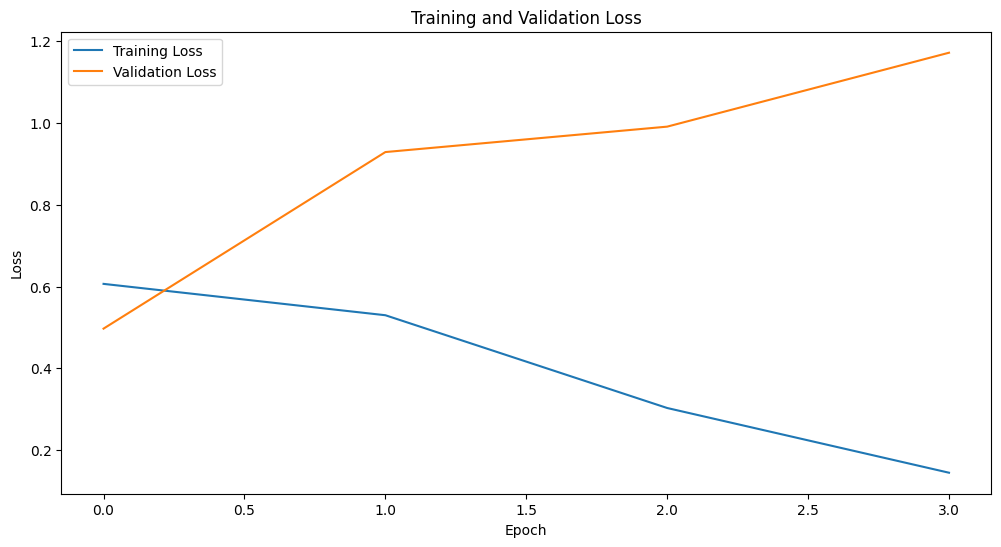

/home/queziaa/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/queziaa/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/queziaa/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/queziaa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/queziaa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/queziaa/.loca

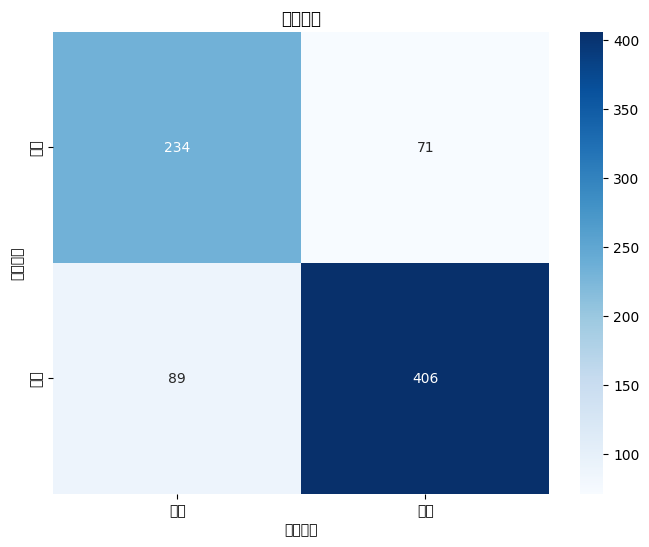

模型已保存到 ./chinese_bert_classifier
句子: 我觉得这个产品非常好用，推荐购买。
情感预测: 负面, 置信度: 0.9997

句子: 服务态度极差，以后再也不会光顾了。
情感预测: 负面, 置信度: 0.9995

句子: 这家餐厅的菜品一般，但是环境不错。
情感预测: 负面, 置信度: 0.9997

句子: 这部电影剧情老套，演员表演也很一般。
情感预测: 负面, 置信度: 0.9998



In [4]:
# 导入必要的库
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time


# 设置随机种子，保证可复现性
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

set_seed(42)

# 检查是否有GPU可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 创建一个简单的二分类数据集（正面评论和负面评论）
# 在实际应用中，您应该替换为您自己的数据集
positive_texts = []

negative_texts = []


import json
with open('../DATA/train.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
for i in data:
    if ' hate ' in i['output'] :
        positive_texts.append(i['content'])
    elif ' hate ' not in i['output'] and ' non-hate ' in i['output']:
        negative_texts.append(i['content'])
    else:
        pass

# 构建数据集
texts = positive_texts + negative_texts
labels = [1] * len(positive_texts) + [0] * len(negative_texts)
df = pd.DataFrame({"text": texts, "label": labels})

# 打乱数据
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())

# 加载中文BERT的tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

# 对文本进行编码
def encode_texts(texts, max_length=64):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    df['text'].values, 
    df['label'].values, 
    test_size=0.2, 
    random_state=42, 
    stratify=df['label'].values
)

# 编码训练集和验证集
train_inputs, train_masks = encode_texts(X_train)
val_inputs, val_masks = encode_texts(X_val)

# 转换为PyTorch张量
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# 创建数据加载器
batch_size = 4

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# 加载预训练的中文BERT模型
model = BertForSequenceClassification.from_pretrained(
    'bert-base-chinese',
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)

model.to(device)

# 设置优化器
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# 定义训练轮次
epochs = 4

# 计算总训练步数
total_steps = len(train_dataloader) * epochs

# 创建学习率调度器
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# 定义训练函数
def train_model(model, train_dataloader, val_dataloader, epochs, optimizer, scheduler, device):
    # 用于存储训练和评估损失
    training_stats = []
    
    # 测量整个训练时间
    total_t0 = time.time()
    
    for epoch in range(epochs):
        print(f"\n======== Epoch {epoch+1} / {epochs} ========")
        print('训练中...')
        
        # 重置每个epoch的总损失
        total_train_loss = 0
        
        # 将模型置于训练模式
        model.train()
        
        # 对dataloader中的每个batch进行训练
        for step, batch in enumerate(train_dataloader):
            # 每隔40个batch输出一次进度
            if step % 100 == 0 and not step == 0:
                print(f'  Batch {step} / {len(train_dataloader)}')
            
            # 解包batch中的数据
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            
            # 清除之前的梯度
            model.zero_grad()        
            
            # 前向传播
            outputs = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask, 
                           labels=b_labels)
            
            loss = outputs.loss
            total_train_loss += loss.item()
            
            # 反向传播
            loss.backward()
            
            # 梯度裁剪，避免梯度爆炸
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            
            # 更新参数
            optimizer.step()
            
            # 更新学习率
            scheduler.step()
        
        # 计算平均损失
        avg_train_loss = total_train_loss / len(train_dataloader)
        
        print(f"\n  Average training loss: {avg_train_loss:.2f}")
        
        print("\n验证中...")
        
        # 将模型置于评估模式
        model.eval()
        
        # 追踪变量
        total_eval_accuracy = 0
        total_eval_loss = 0
        all_predictions = []
        all_true_labels = []
        
        # 评估数据
        for batch in val_dataloader:
            # 解包batch中的数据
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            
            # 不计算梯度
            with torch.no_grad():
                outputs = model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels)
            
            loss = outputs.loss
            total_eval_loss += loss.item()
            
            # 获取预测结果
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            
            # 保存预测和真实标签
            all_predictions.extend(predictions.cpu().numpy())
            all_true_labels.extend(b_labels.cpu().numpy())
            
        # 计算准确率
        accuracy = accuracy_score(all_true_labels, all_predictions)
        f1 = f1_score(all_true_labels, all_predictions)
        
        # 计算混淆矩阵
        cm = confusion_matrix(all_true_labels, all_predictions)
        tn, fp, fn, tp = cm.ravel()
        
        print(f"  混淆矩阵详情:")
        print(f"  真正例 (TP): {tp}")
        print(f"  假正例 (FP): {fp}")
        print(f"  假负例 (FN): {fn}")
        print(f"  真负例 (TN): {tn}")
        # 计算平均损失
        avg_val_loss = total_eval_loss / len(val_dataloader)
        
        print(f"  Validation Loss: {avg_val_loss:.2f}")
        print(f"  Accuracy: {accuracy:.2f}")
        print(f"  F1 Score: {f1:.2f}")
        
        # 保存本轮的统计数据
        training_stats.append({
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Validation Loss': avg_val_loss,
            'Accuracy': accuracy,
            'F1 Score': f1
        })
    
    print("\n训练完成!")
    
    print(f"总训练时间: {(time.time() - total_t0):.2f} 秒")
    
    return model, training_stats

# 训练模型
model, stats = train_model(model, train_dataloader, val_dataloader, epochs, optimizer, scheduler, device)

# 可视化训练结果
df_stats = pd.DataFrame(stats)
print(df_stats)

# 绘制训练和验证损失曲线
plt.figure(figsize=(12,6))
plt.plot(df_stats['Training Loss'], label='Training Loss')
plt.plot(df_stats['Validation Loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制混淆矩阵
model.eval()
predictions = []
true_labels = []

for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).flatten()
    
    predictions.extend(preds.cpu().numpy())
    true_labels.extend(b_labels.cpu().numpy())

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['负面', '正面'], yticklabels=['负面', '正面'])
plt.title('混淆矩阵')
plt.ylabel('真实标签')
plt.xlabel('预测标签')
plt.show()

# 保存模型
model_path = "./chinese_bert_classifier"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
print(f"模型已保存到 {model_path}")

# 进行预测示例
def predict_sentiment(text, model, tokenizer):
    # 对文本进行编码
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=256,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    # 将编码后的数据移到指定设备
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)
    
    # 设置模型为评估模式
    model.eval()
    
    # 进行预测
    with torch.no_grad():
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    # 获取预测结果
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()
    confidence = torch.nn.functional.softmax(logits, dim=1)[0][prediction].item()
    
    # 返回预测结果和置信度
    sentiment = "正面" if prediction == 1 else "负面"
    return sentiment, confidence

# 测试一些新的句子
test_sentences = [
    "我觉得这个产品非常好用，推荐购买。",
    "服务态度极差，以后再也不会光顾了。",
    "这家餐厅的菜品一般，但是环境不错。",
    "这部电影剧情老套，演员表演也很一般。"
]

for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
    print(f"句子: {sentence}")
    print(f"情感预测: {sentiment}, 置信度: {confidence:.4f}")
    print()